In [284]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task: Determine the eligibility for granting Home loan.

Objective of this case study is:

1.   To understand the patterns in the data.
2.   How to Handle the categorical features.
3. How to deal with missing data.
4. Feature Engineering
5. Finding the most important features while taking the decision of granting a loan application.
6. Understanding the Normalization and standardisation of the data.


In [286]:
data = pd.read_csv("loan.csv")

In [287]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [288]:
data.shape

(614, 13)

In [289]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [290]:
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [291]:
tdf = pd.DataFrame({"feature1" :[1,2,3], 
              "feature 2" : [4,5,6]})


In [292]:
tdf

,feature1,feature 2
0,1,4
1,2,5
2,3,6


In [293]:
tdf.feature1

0    1
1    2
2    3
Name: feature1, dtype: int64

In [294]:
tdf["feature1"]

0    1
1    2
2    3
Name: feature1, dtype: int64

In [295]:
tdf["feature 2"]

0    4
1    5
2    6
Name: feature 2, dtype: int64

In [296]:
# tdf.feature 2

In [297]:
# data.Dependents.unique()

In [298]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [299]:
data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [300]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [301]:
data.drop("Loan_ID", axis = 1, inplace  = True)

In [302]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## analyse the missing values

In [303]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [304]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [305]:
cat_columns = list(data.dtypes[data.dtypes == "object"].index)
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [306]:
cat_columns.remove("Loan_Status")

In [307]:
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [308]:
target = 'Loan_Status'
target

'Loan_Status'

In [309]:
num_columns = list(data.dtypes[data.dtypes != "object"].index)
num_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [310]:
## analysis of target varaible

In [311]:
data.shape

(614, 12)

In [312]:
data[target].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [313]:
## P(Randomly select a person, chances his loan will be rejected) ? 

In [314]:
422/(422+192)

0.6872964169381107

In [315]:
data[target].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [316]:
## Approval Rate ~ 69%, 40%, 56%, 10%
## Rejection Rate ~ 31% 

In [317]:
target

'Loan_Status'

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

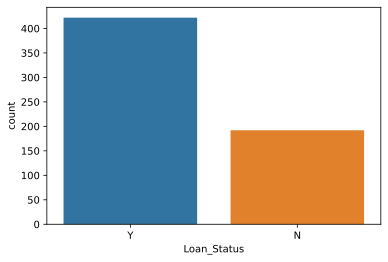

In [318]:
## let's see it visually
sns.countplot(data = data, x = target)

In [319]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


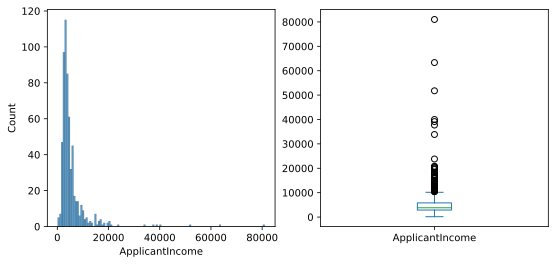

In [320]:
#Income of the applicant
plt.subplot(121)
sns.histplot(data["ApplicantIncome"])

plt.subplot(122)
data["ApplicantIncome"].plot.box(figsize=(9,4))
plt.show()


In [321]:
data[["ApplicantIncome", "Loan_Status"]]

,ApplicantIncome,Loan_Status
0,5849,Y
1,4583,N
2,3000,Y
3,2583,Y
4,6000,Y
...,...,...
609,2900,Y
610,4106,Y
611,8072,Y
612,7583,Y


In [322]:
data.groupby("Loan_Status")["ApplicantIncome"].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [323]:
## this diff in means, is this significant

In [324]:
from scipy.stats import ttest_ind

In [325]:
data[data[target] == "N"]["ApplicantIncome"]
data[data[target] == "Y"]["ApplicantIncome"]

0      5849
2      3000
3      2583
4      6000
5      5417
       ... 
608    3232
609    2900
610    4106
611    8072
612    7583
Name: ApplicantIncome, Length: 422, dtype: int64

In [326]:
## H0 : means are same,  ApplicantIncome is bad perdictor of loan_status

## HA : means are diff, ApplicantIncome is good perdictor of loan_status

alpha = 0.05

t_stat, p_value = ttest_ind(data[data[target] == "Y"]["ApplicantIncome"], 
          data[data[target] == "N"]["ApplicantIncome"])

print(p_value)

if p_value<alpha: 
    print("Reject H0 : ", "means are diff, ApplicantIncome is good perdictor of loan_status")
else:
     print("Fail to Reject H0 : ", "means are same, ApplicantIncome is bad perdictor of loan_status")

0.907287812130518
Fail to Reject H0 :  means are same, ApplicantIncome is bad perdictor of loan_status


In [327]:
# data

In [328]:
num_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [329]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [330]:
def feature_selction_ttest(data = data, col_name = "ApplicantIncome"):

    alpha = 0.05

    _,p_value = ttest_ind(data[data[target] == "Y"][col_name], 
              data[data[target] == "N"][col_name])
    
    print(p_value)
    
    if p_value  < alpha:
        print(f"{col_name} is a good perdictor of loan_status")
    else:
        print(f"{col_name} is a bad perdictor of loan_status")

In [331]:
feature_selction_ttest(col_name="ApplicantIncome")

0.907287812130518
ApplicantIncome is a bad perdictor of loan_status


In [332]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [333]:
data["Credit_History"].value_counts() # categorical var

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [334]:
pd.crosstab(data["Credit_History"], data[target])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [335]:
pd.crosstab(data["Credit_History"], data[target] , normalize="index")

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789


In [336]:
from scipy.stats import chi2_contingency #, chisquare

In [337]:
## H0 : Credit_History is a bad perdictor of loan_status

## HA : Credit_History is a good perdictor of loan_status

alpha = 0.05

_, p_value,_,_ = chi2_contingency(pd.crosstab(data["Credit_History"], data[target]))

print(np.round(p_value))

# p_value <<<<< alpha 
# Reject H0; Credit_History is a good perdictor of loan_status

0.0


In [338]:
pd.crosstab(data["Gender"], data[target])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [339]:
def feature_selction_chi2test(data = data, col_name = "Gender"):

    alpha = 0.05

    _, p_value,_,_ = chi2_contingency(pd.crosstab(data[col_name], 
                                                  data[target]))
    
    print(p_value)
    
    if p_value  < alpha:
        print(f"{col_name} is a good perdictor of loan_status")
    else:
        print(f"{col_name} is a bad perdictor of loan_status")

In [340]:
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [341]:
feature_selction_chi2test(col_name="Gender")

0.7086529816451106
Gender is a bad perdictor of loan_status


In [342]:
feature_selction_chi2test(col_name="Married")

0.03439381301579988
Married is a good perdictor of loan_status


In [343]:
feature_selction_chi2test(col_name="Dependents")

0.3678506740863211
Dependents is a bad perdictor of loan_status


In [344]:
feature_selction_chi2test(col_name="Education")

0.04309962129357355
Education is a good perdictor of loan_status


In [345]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [346]:
feature_selction_ttest(col_name="ApplicantIncome")

0.907287812130518
ApplicantIncome is a bad perdictor of loan_status


In [347]:
feature_selction_ttest(col_name="CoapplicantIncome")

0.14294828684286368
CoapplicantIncome is a bad perdictor of loan_status


## Create new features

In [348]:
data["Total_Income"] = data["ApplicantIncome"] + data["CoapplicantIncome"]

In [349]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [350]:
feature_selction_ttest(col_name="Total_Income")

0.4392445339235994
Total_Income is a bad perdictor of loan_status


In [351]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [352]:
data['Loan_Amount_Term'] = (data['Loan_Amount_Term']/12)

In [353]:
data['Loan_Amount_Term'].value_counts()

30.0    512
15.0     44
40.0     15
25.0     13
20.0      4
7.0       4
10.0      3
5.0       2
3.0       2
1.0       1
Name: Loan_Amount_Term, dtype: int64

In [354]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0


In [355]:
data['Loan_Amount_per_year'] = data["LoanAmount"]/data["Loan_Amount_Term"]


In [356]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Amount_per_year
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000


In [357]:
data["EMI"] = (data['Loan_Amount_per_year']*1000)/12  #EMI


In [358]:
2000000/(4*12)

41666.666666666664

In [359]:
(data['Total_Income']*0.3 > data['EMI']).astype(int)

0      0
1      1
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    1
Length: 614, dtype: int64

In [360]:
data["Able_to_pay_EMI"] = (data['Total_Income']*0.3 > data['EMI']).astype(int)


In [361]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000,391.666667,1


In [362]:
pd.crosstab(data["Loan_Status"], data["Able_to_pay_EMI"])

Able_to_pay_EMI,0,1
Loan_Status,,
N,19,173
Y,21,401


In [363]:
feature_selction_chi2test(col_name="Able_to_pay_EMI")

0.03455011506195388
Able_to_pay_EMI is a good perdictor of loan_status


## Missing Value Analysis

In [364]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000,391.666667,1


In [365]:
data.isnull().sum()

Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed           32
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              22
Loan_Amount_Term        14
Credit_History          50
Property_Area            0
Loan_Status              0
Total_Income             0
Loan_Amount_per_year    36
EMI                     36
Able_to_pay_EMI          0
dtype: int64

In [366]:
num_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [367]:
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [368]:
data["Credit_History"].value_counts(dropna = False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [369]:
data["Credit_History"] = data["Credit_History"].fillna(2)

In [370]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000,391.666667,1


In [371]:
data.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [372]:
data["Self_Employed"] = data["Self_Employed"].fillna("other")

In [373]:
data.Self_Employed.unique()

array(['No', 'Yes', 'other'], dtype=object)

## for numerical features

In [374]:
data[num_columns].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
dtype: int64

In [375]:
# median imputation for numerical columns

from sklearn.impute import SimpleImputer

In [376]:
si = SimpleImputer(strategy = "median")

In [377]:
## fits - identifies the median
## transform - replaces the missing values with median

In [378]:
vals = pd.DataFrame([10, 20, 10, 15, 17, 18, 21, np.nan])
vals

,0
0,10.0
1,20.0
2,10.0
3,15.0
4,17.0
5,18.0
6,21.0
7,NaN


In [379]:
# np.median([10, 20, 10, 15, 17, 18, 21]) # manually 

In [380]:
vals[0]

0    10.0
1    20.0
2    10.0
3    15.0
4    17.0
5    18.0
6    21.0
7     NaN
Name: 0, dtype: float64

In [381]:
si.fit_transform(vals)

array([[10.],
       [20.],
       [10.],
       [15.],
       [17.],
       [18.],
       [21.],
       [17.]])

In [382]:
data.isnull().sum()

Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              22
Loan_Amount_Term        14
Credit_History           0
Property_Area            0
Loan_Status              0
Total_Income             0
Loan_Amount_per_year    36
EMI                     36
Able_to_pay_EMI          0
dtype: int64

In [383]:
num_missing = ['EMI', 'Loan_Amount_per_year',  'LoanAmount',  'Loan_Amount_Term']


median_imputer = SimpleImputer(strategy = 'median') 

for col in num_missing:
    
    data[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[col])))

In [384]:
# pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data["EMI"])))

In [385]:
data.isnull().sum()

Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
Total_Income             0
Loan_Amount_per_year     0
EMI                      0
Able_to_pay_EMI          0
dtype: int64

In [386]:
# data

In [388]:
# Highest Freq imputation for some categorical columns.

cat_missing = ['Gender', 'Married','Dependents']

freq_imputer = SimpleImputer(strategy = 'most_frequent')

for col in cat_missing:
    data[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

In [389]:
data.isnull().sum()

Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
Total_Income            0
Loan_Amount_per_year    0
EMI                     0
Able_to_pay_EMI         0
dtype: int64

In [390]:
# data["Total_Income"].fillna(np.median(data["Total_Income"]))

In [391]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,Y,5849.0,4.383333,365.277778,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000,391.666667,1


In [392]:
data["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [393]:
data.loc[data['Dependents'] == '3+', 'Dependents'] = 3

In [394]:
# data.Dependents

In [395]:
data['Dependents'] = data['Dependents'].astype(int)

In [396]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [397]:
# Loan_Status
col='Loan_Status'
data[col].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [398]:
data[col]

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

## Label Encoding

In [399]:
from sklearn.preprocessing import LabelEncoder

In [400]:
label_encoder = LabelEncoder()

In [401]:
data[col] = label_encoder.fit_transform(data[col])

In [402]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,1,5849.0,4.383333,365.277778,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,0,6091.0,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,1,3000.0,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,1,4941.0,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,1,6000.0,4.700000,391.666667,1


In [403]:
tdf = pd.DataFrame({"a" : ["low", "medium"]})
tdf

,a
0,low
1,medium


In [404]:
tdf["b"] = tdf["a"].map({"low" : 0, "medium" : 1})

In [405]:
tdf

,a,b
0,low,0
1,medium,1


In [406]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [407]:
data["Gender"]

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [408]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

ohe.fit_transform(data[["Gender"]]).toarray()


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [409]:
tdf1 = pd.DataFrame(ohe.fit_transform(data[["Gender"]]).toarray(), columns = ["Female_Binary", "Male_Binary"])
tdf1

,Female_Binary,Male_Binary
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
609,1.0,0.0
610,0.0,1.0
611,0.0,1.0
612,0.0,1.0


In [410]:
data.drop("Gender", axis = 1, inplace=True)

In [411]:
data

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,1,5849.0,4.383333,365.277778,0
1,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,0,6091.0,4.266667,355.555556,1
2,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,1,3000.0,2.200000,183.333333,1
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,1,4941.0,4.000000,333.333333,1
4,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,1,6000.0,4.700000,391.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,1,2900.0,2.366667,197.222222,1
610,Yes,3,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,1,4106.0,2.666667,222.222222,1
611,Yes,1,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,1,8312.0,8.433333,702.777778,1
612,Yes,2,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,1,7583.0,6.233333,519.444444,1


In [415]:
data = pd.concat([tdf1, data], axis = 1)
data.head()

,Female_Binary,Male_Binary,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,0.0,1.0,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,1,5849.0,4.383333,365.277778,0
1,0.0,1.0,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,0,6091.0,4.266667,355.555556,1
2,0.0,1.0,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,1,3000.0,2.200000,183.333333,1
3,0.0,1.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,1,4941.0,4.000000,333.333333,1
4,0.0,1.0,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,1,6000.0,4.700000,391.666667,1


In [416]:
# pd.get_dummies()

In [417]:
data.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [419]:
data["Loan_Status"].value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

In [420]:
data.groupby("Married")["Loan_Status"].mean()

Married
No     0.629108
Yes    0.718204
Name: Loan_Status, dtype: float64

In [421]:
data["Married"]

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object

In [422]:
!pip install category_encoders

In [424]:
target

'Loan_Status'

In [426]:
data["Married"][:5]

0     No
1    Yes
2    Yes
3    Yes
4     No
Name: Married, dtype: object

In [427]:
data.groupby("Married")["Loan_Status"].mean()

Married
No     0.629108
Yes    0.718204
Name: Loan_Status, dtype: float64

In [428]:
from category_encoders import TargetEncoder

te = TargetEncoder()


col = "Married"

data[col] = te.fit_transform(data[col], data[target])


/Users/shvm/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/Users/shvm/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [429]:
data["Married"]

0      0.629108
1      0.718204
2      0.718204
3      0.718204
4      0.629108
         ...   
609    0.629108
610    0.718204
611    0.718204
612    0.718204
613    0.629108
Name: Married, Length: 614, dtype: float64

In [430]:
data

,Female_Binary,Male_Binary,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,0.0,1.0,0.629108,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,1,5849.0,4.383333,365.277778,0
1,0.0,1.0,0.718204,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,0,6091.0,4.266667,355.555556,1
2,0.0,1.0,0.718204,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,1,3000.0,2.200000,183.333333,1
3,0.0,1.0,0.718204,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,1,4941.0,4.000000,333.333333,1
4,0.0,1.0,0.629108,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,1,6000.0,4.700000,391.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.629108,0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,1,2900.0,2.366667,197.222222,1
610,0.0,1.0,0.718204,3,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,1,4106.0,2.666667,222.222222,1
611,0.0,1.0,0.718204,1,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,1,8312.0,8.433333,702.777778,1
612,0.0,1.0,0.718204,2,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,1,7583.0,6.233333,519.444444,1


In [431]:
# 5 to 6 categories 

# ------- 